___

http://www.pieriandata.com

https://pieriantraining.com/
___

# Logistic Regression

Using a logistic regression curve the values can only be between 0 and 1. This is useful for classification problems.

given the logistic regression formula:

$$\Phi(z) = \frac{1}{1 + e^{-z}}$$

where: no matter what value z has, the result will always be between 0 and 1.


# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.



## Confusion Matrix

Given the example matrix of a binary classification problem:

| n =165 | Predicted: 0 | Predicted: 1 | |
| --- | --- | --- | --- |
| Actual: 0 | True Negative = 50 | False Positive = 10 | 60 |
| Actual: 1 | False Negative = 5 | True Positive = 100 | 105 |
| | 55 | 110 | 165 |


**False Positive:** Type I error
**False Negative:** Type II error

**The accuracy of the model (How often is it correct?) is given by:**

(True Positive + True Negative) / Total

(50 + 100) / 165 = 0.91

**Missclassification Rate (Error Rate) is given by:**

(False Positive + False Negative) / Total

(10 + 5) / 165 = 0.09


## Kaggle

https://www.kaggle.com

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [61]:
train = pd.read_csv('titanic_train.csv')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Parch = number of parents or children on board

SibSp = number of siblings or spouses on board

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [63]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

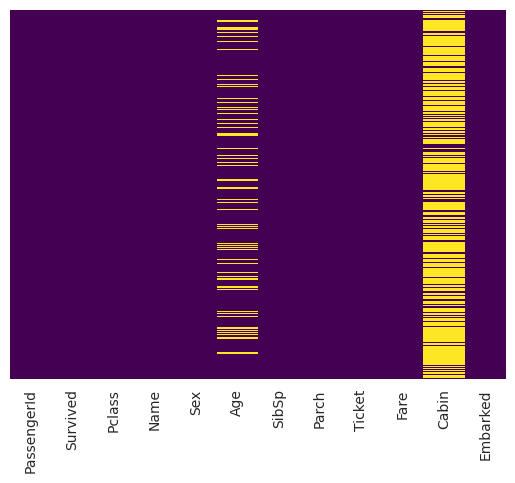

In [64]:
sns.heatmap(
  data=train.isnull(),
  yticklabels=False,
  cbar=False,
  cmap='viridis',
)

<Axes: >

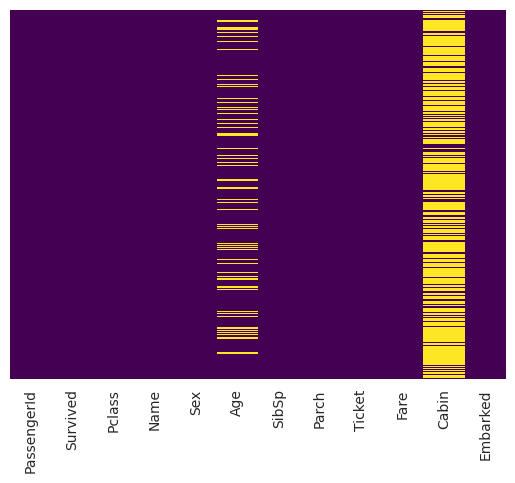

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [66]:
sns.set_style('whitegrid')


<Axes: xlabel='Survived', ylabel='count'>

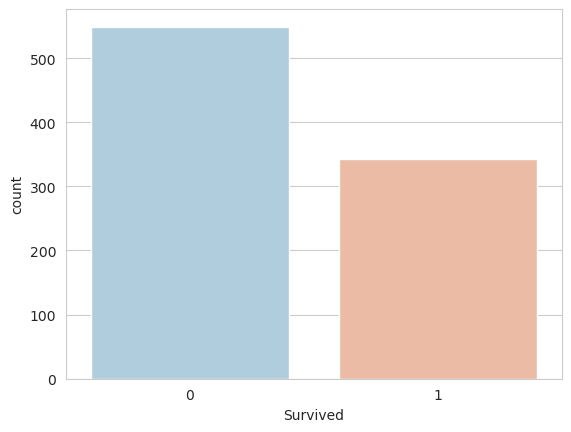

In [67]:
sns.countplot(
    x='Survived',
    data=train,
    palette='RdBu_r',
)
# 0 Not survived
# 1 Survived

<Axes: xlabel='Survived', ylabel='count'>

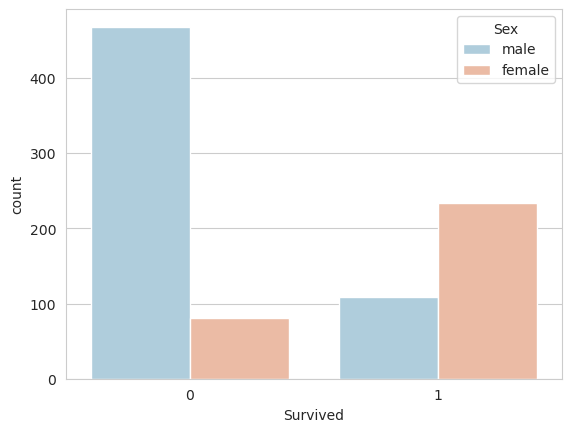

In [68]:
sns.countplot(
    x='Survived',
    hue='Sex',
    data=train,
    palette='RdBu_r',
)


<Axes: xlabel='Survived', ylabel='count'>

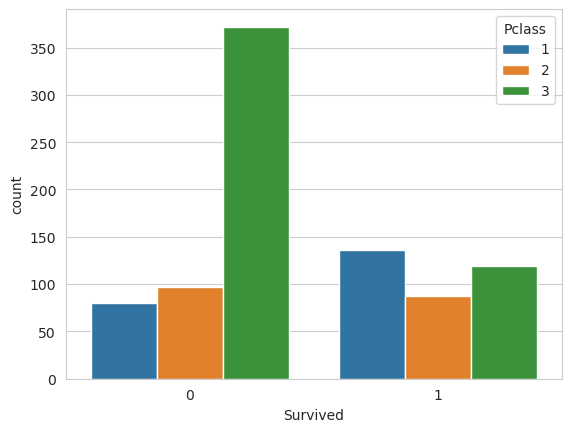

In [69]:
sns.countplot(
    x='Survived',
    hue='Pclass',
    data=train,
)


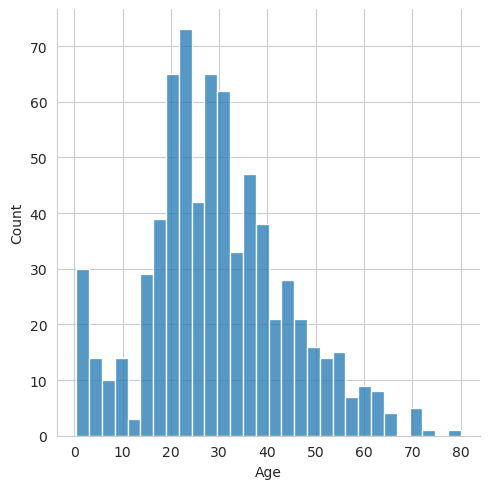

In [70]:
sns.displot(
  data=train['Age'].dropna(),
  bins=30,
)

<Axes: >

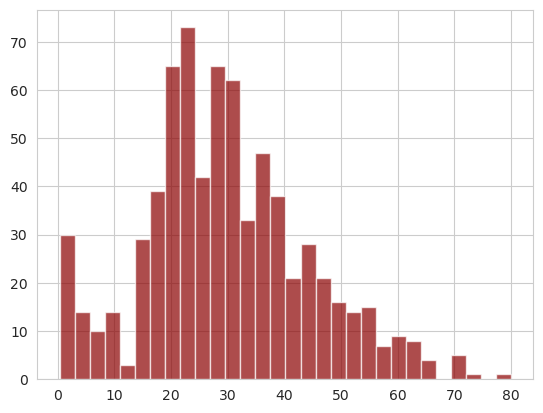

In [71]:
train['Age'].hist(
    bins=30,
    color='darkred',
    alpha=0.7,
)


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

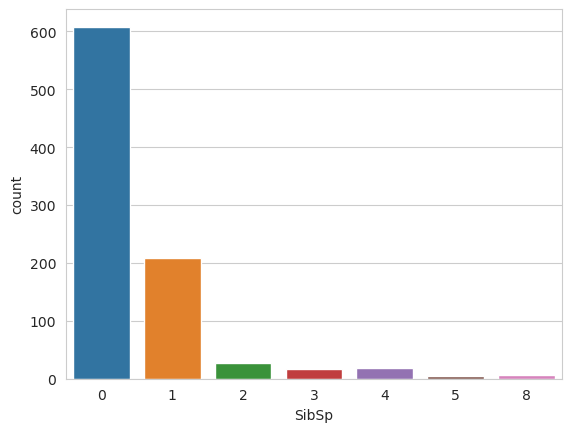

In [73]:
sns.countplot(
  x='SibSp',
  data=train,
)

<Axes: >

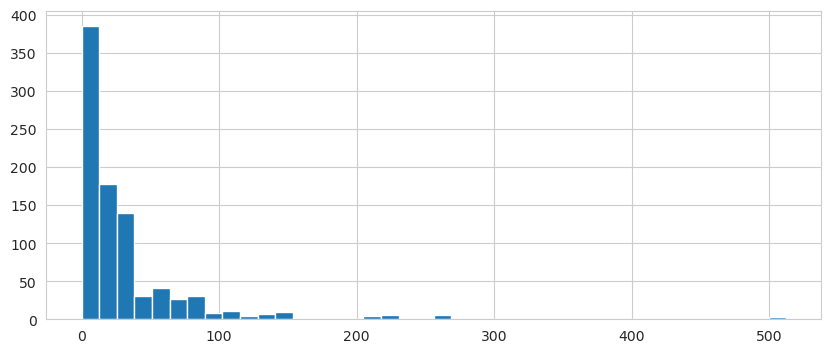

In [74]:
train['Fare'].hist(
  bins=40,
  figsize=(10,4),
)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [75]:
import cufflinks as cf
cf.go_offline()

In [76]:
train['Fare'].iplot(
  kind='hist',
  bins=30,
  color='green',
)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

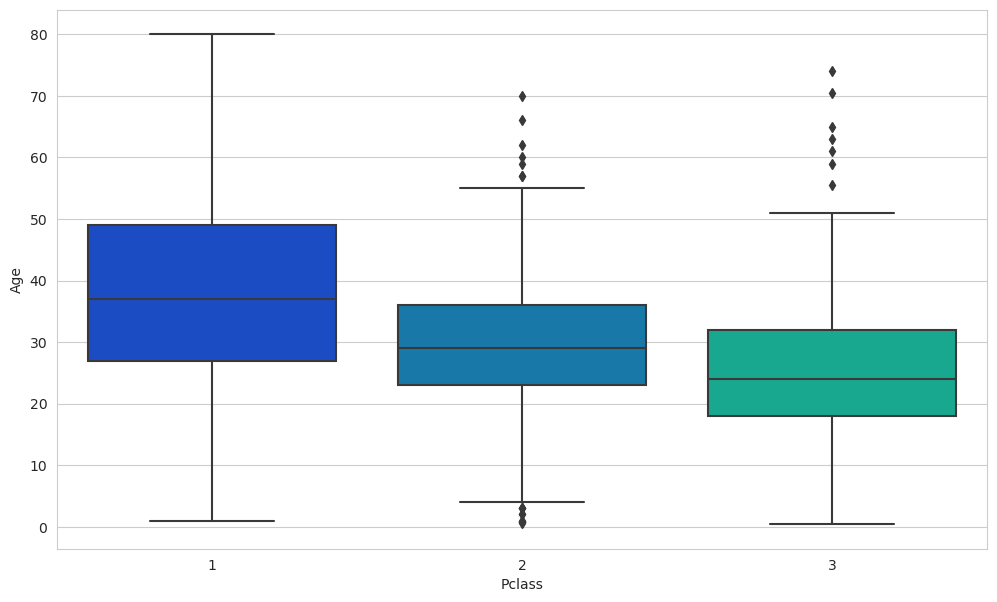

In [77]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='Pclass',
    y='Age',
    data=train,
    palette='winter',
)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [78]:
train['Age'].mean()

29.69911764705882

In [79]:
train.groupby('Pclass').mean()['Age']

/tmp/ipykernel_3368/2515295773.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [80]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 29
    else:
      return 25
  else:
    return Age

Now apply that function!

In [81]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [82]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [83]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Now let's check that heat map again!

<Axes: >

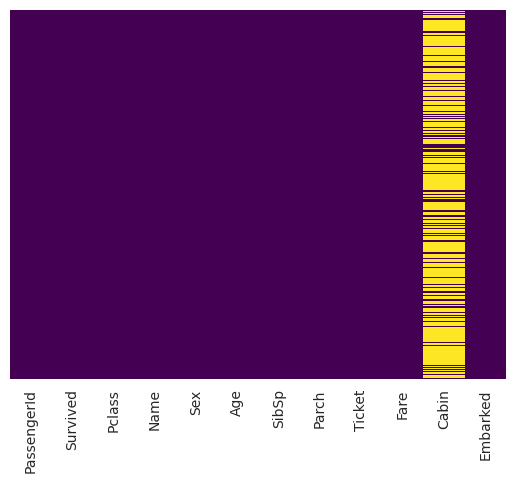

In [84]:
sns.heatmap(
    train.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis',
)


Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

There is too much missing information in the Cabin column so we will drop it.

In [85]:
train.drop('Cabin',axis=1,inplace=True)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
train.dropna(inplace=True)

<Axes: >

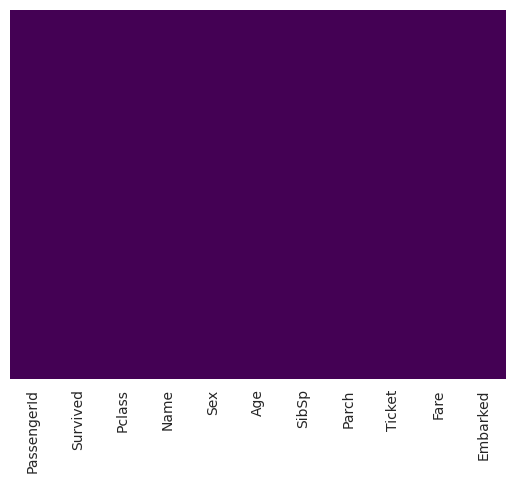

In [88]:
sns.heatmap(
    train.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis',
)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

An algorith doesnt understand the meaning of the words so we must transform them into numbers.

In [89]:
pd.get_dummies(
  train['Sex']
)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [91]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [44]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [92]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.columns = ['embark_Q', 'embark_S']
embark

,embark_Q,embark_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [95]:
train = pd.concat([train,sex,embark],axis=1)

In [96]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,embark_Q,embark_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [97]:
train.tail()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,embark_Q,embark_S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,25.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [98]:
train.drop('PassengerId',axis=1,inplace=True)

In [99]:
train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,embark_Q,embark_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Homework

Test the algorithm using the Pclass column as is VS the Pclass column as dummy variables.

In [101]:
train_pclass = train[:]
train_pclass

,Survived,Pclass,Age,SibSp,Parch,Fare,male,embark_Q,embark_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [102]:
pclass = pd.get_dummies(train_pclass['Pclass']).drop(3, axis=1)
pclass.columns = ['Pclass_1', 'Pclass_2']
pclass

,Pclass_1,Pclass_2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,1
887,1,0
888,0,0
889,1,0


In [103]:
train_pclass = pd.concat([train_pclass, pclass], axis=1)
train_pclass

,Survived,Pclass,Age,SibSp,Parch,Fare,male,embark_Q,embark_S,Pclass_1,Pclass_2
0,0,3,22.0,1,0,7.2500,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,3,25.0,1,2,23.4500,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,0


In [104]:
train_pclass.drop('Pclass', axis=1, inplace=True)
train_pclass

,Survived,Age,SibSp,Parch,Fare,male,embark_Q,embark_S,Pclass_1,Pclass_2
0,0,22.0,1,0,7.2500,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,25.0,1,2,23.4500,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,1,0



# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

In [110]:
X_pclass = train_pclass.drop('Survived', axis=1)

In [106]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=101,
)


In [120]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_pclass,
    y,
    test_size=0.30,
    random_state=101,
)

## Training and Predicting

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [113]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train, max)

/home/luis/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [121]:
predictions = logmodel.predict(X_test)
# predictions

In [122]:
logmodel_class = LogisticRegression()
logmodel_class.fit(X_train_class,y_train_class)


/home/luis/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [125]:
predictions_class = logmodel_class.predict(X_test_class)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [126]:
print(classification_report(y_test, predictions_class))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [118]:
from sklearn.metrics import confusion_matrix



In [119]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]])

In [127]:
confusion_matrix(y_test, predictions_class)


array([[149,  14],
       [ 33,  71]])

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!